In [6]:
import pandas as pd
import csv
from collections import Counter
import re

import matplotlib.pyplot as plt
import seaborn as sns

## <1> count how many unique proteins in each files
- Date : 23/06/15
- Author : Jeesu Lee

### <1-1> protein : all

##### step1. reads the txt file

In [61]:
file_data_mapping = {
    'baumannii_all': {
        'file_name': 'D:\Bacteriophage\ESKAPE\Heatmap\A_baumannii_all.txt',
        'protein_csv_name': 'all_protein_Acinobacter_baumannii.csv',
        'unique_words_csv_name': 'all_unique_words_Acinobacter_baumannii.csv'
    },

    'campylobacter_All': {
        'file_name': 'D:\Bacteriophage\ESKAPE\Heatmap\campylobacter_All.txt',
        'protein_csv_name': 'all_protein_Campylobacter_jejuni.csv',
        'unique_words_csv_name': 'all_unique_words_Campylobacter_jejuni.csv'
    },

    'E_coli_all': {
        'file_name': 'D:\Bacteriophage\ESKAPE\Heatmap\E_coli_all.txt',
        'protein_csv_name': 'all_protein_Escherichia_coli.csv',
        'unique_words_csv_name': 'all_unique_words_Escherichia_coli.csv'
    },

    'E_faecium_All': {
        'file_name': 'D:\Bacteriophage\ESKAPE\Heatmap\E_faecium_All.txt',
        'protein_csv_name': 'all_protein_Enterococcus_faecium.csv',
        'unique_words_csv_name': 'all_unique_words_Enterococcus_faecium.csv'
    },

    'H_influenzae_All': {
        'file_name': 'D:\Bacteriophage\ESKAPE\Heatmap\H_influenzae_All.txt',
        'protein_csv_name': 'all_protein_Haemophilus_influenzae.csv',
        'unique_words_csv_name': 'all_unique_words_Haemophilus_influenzae.csv'
    },

    'H_pylori_All': {
        'file_name': 'D:\Bacteriophage\ESKAPE\Heatmap\H_pylori_All.txt',
        'protein_csv_name': 'all_protein_Helicobacter_pylori.csv',
        'unique_words_csv_name': 'all_unique_words_Helicobacter_pylori.csv'
    },


    'P_aeruginosa_all': {
        'file_name': 'D:\Bacteriophage\ESKAPE\Heatmap\Pseudomonas aeruginosa_all.txt',
        'protein_csv_name': 'all_protein_Pseudomonas_aeruginosa.csv',
        'unique_words_csv_name': 'all_unique_words_Pseudomonas_aeruginosa.csv'
    },

    'S_aureus_all': {
        'file_name': 'D:\Bacteriophage\ESKAPE\Heatmap\Staphylococcus aureus_all.txt',
        'protein_csv_name': 'all_protein_Staphylococcus_aureus.csv',
        'unique_words_csv_name': 'all_unique_words_Staphylococcus_aureus.csv'
    },

    'S_pneumoniae_All': {
        'file_name': 'D:\Bacteriophage\ESKAPE\Heatmap\S_pneumoniae_All.txt',
        'protein_csv_name': 'all_protein_Streptococcus_pneumoniae.csv',
        'unique_words_csv_name': 'all_unique_words_Streptococcus_pneumoniae.csv'
    },

    'Salmonellae_All': {
        'file_name': 'D:\Bacteriophage\ESKAPE\Heatmap\Salmonellae_All.txt',
        'protein_csv_name': 'all_protein_Salmonella_enterica.csv',
        'unique_words_csv_name': 'all_unique_words_Salmonella_enterica.csv'
    },

    'Shigella_All': {
        'file_name': 'D:\Bacteriophage\ESKAPE\Heatmap\Shigella_All.txt',
        'protein_csv_name': 'all_protein_Shigella_flexneri.csv',
        'unique_words_csv_name': 'all_unique_words_Shigella_flexneri.csv'
    }
}

##### step2. create a dataframe with two columns, 'word' and 'value', based on txt file
##### step3. calculates the frequency of data in the 'word' column

In [67]:
for file_key, file_info in file_data_mapping.items():
    file_name = file_info['file_name']
    protein_csv_name = file_info['protein_csv_name']
    unique_words_csv_name = file_info['unique_words_csv_name']

    with open(file_name, 'r') as file:
        lines = file.readlines()

    data = [(item[0].strip().lower(), item[1]) for item in eval(lines[0])]
    protein_df = pd.DataFrame(data, columns=['word', 'value'])
    protein_df.to_csv(protein_csv_name, index=False)

    word_counts = protein_df['word'].value_counts().sort_values(ascending=False)
    unique_words_df = pd.DataFrame({'word': word_counts.index, 'count': word_counts.values})
    unique_words_df.to_csv(unique_words_csv_name, index=False)

### <1-2> Protein : function

##### step1. reads the txt file

In [59]:
file_data_mapping = {
    'baumannii_function': {
        'file_name': 'D:\Bacteriophage\ESKAPE\Heatmap\A_baumannii_function.txt',
        'protein_csv_name': 'function_protein_Acinobacter_baumannii.csv',
        'unique_words_csv_name': 'function_unique_words_Acinobacter_baumannii.csv'
    },

    'campylobacter_function': {
        'file_name': 'D:\Bacteriophage\ESKAPE\Heatmap\campylobacter_function.txt',
        'protein_csv_name': 'function_protein_Campylobacter_jejuni.csv',
        'unique_words_csv_name': 'function_unique_words_Campylobacter_jejuni.csv'
    },

    'E_coli_function': {
        'file_name': 'D:\Bacteriophage\ESKAPE\Heatmap\E_coli_function.txt',
        'protein_csv_name': 'function_protein_Escherichia_coli.csv',
        'unique_words_csv_name': 'function_unique_words_Escherichia_coli.csv'
    },

    'E_faecium_function': {
        'file_name': 'D:\Bacteriophage\ESKAPE\Heatmap\E_faecium_function.txt',
        'protein_csv_name': 'function_protein_Enterococcus_faecium.csv',
        'unique_words_csv_name': 'function_unique_words_Enterococcus_faecium.csv'
    },

    'H_influenzae_function': {
        'file_name': 'D:\Bacteriophage\ESKAPE\Heatmap\H_influenzae_function.txt',
        'protein_csv_name': 'function_protein_Haemophilus_influenzae.csv',
        'unique_words_csv_name': 'function_unique_words_Haemophilus_influenzae.csv'
    },

    'H_pylori_function': {
        'file_name': 'D:\Bacteriophage\ESKAPE\Heatmap\H_pylori_function.txt',
        'protein_csv_name': 'function_protein_Helicobacter_pylori.csv',
        'unique_words_csv_name': 'function_unique_words_Helicobacter_pylori.csv'
    },


    'P_aeruginosa_function': {
        'file_name': 'D:\Bacteriophage\ESKAPE\Heatmap\Pseudomonas aeruginosa_function.txt',
        'protein_csv_name': 'function_protein_Pseudomonas_aeruginosa.csv',
        'unique_words_csv_name': 'function_unique_words_Pseudomonas_aeruginosa.csv'
    },

    'S_aureus_function': {
        'file_name': 'D:\Bacteriophage\ESKAPE\Heatmap\Staphylococcus aureus_function.txt',
        'protein_csv_name': 'function_protein_Staphylococcus_aureus.csv',
        'unique_words_csv_name': 'function_unique_words_Staphylococcus_aureus.csv'
    },

    'S_pneumoniae_function': {
        'file_name': 'D:\Bacteriophage\ESKAPE\Heatmap\S_pneumoniae_function.txt',
        'protein_csv_name': 'function_protein_Streptococcus_pneumoniae.csv',
        'unique_words_csv_name': 'function_unique_words_Streptococcus_pneumoniae.csv'
    },

    'Salmonellae_function': {
        'file_name': 'D:\Bacteriophage\ESKAPE\Heatmap\Salmonellae_function.txt',
        'protein_csv_name': 'function_protein_Salmonella_enterica.csv',
        'unique_words_csv_name': 'function_unique_words_Salmonella_enterica.csv'
    },

    'Shigella_function': {
        'file_name': 'D:\Bacteriophage\ESKAPE\Heatmap\Shigella_function.txt',
        'protein_csv_name': 'function_protein_Shigella_flexneri.csv',
        'unique_words_csv_name': 'function_unique_words_Shigella_flexneri.csv'
    }
}

##### step2. create a dataframe with two columns, 'word' and 'value', based on txt file
##### step3. calculates the frequency of data in the 'word' column

In [60]:
for file_key, file_info in file_data_mapping.items():
    file_name = file_info['file_name']
    protein_csv_name = file_info['protein_csv_name']
    unique_words_csv_name = file_info['unique_words_csv_name']

    with open(file_name, 'r') as file:
        lines = file.readlines()

    data = [(item[0].strip().lower(), item[1]) for item in eval(lines[0])]
    protein_df = pd.DataFrame(data, columns=['word', 'value'])
    protein_df.to_csv(protein_csv_name, index=False)

    word_counts = protein_df['word'].value_counts().sort_values(ascending=False)
    unique_words_df = pd.DataFrame({'word': word_counts.index, 'count': word_counts.values})
    unique_words_df.to_csv(unique_words_csv_name, index=False)

## <2> Calculates the frequency of common words 
- Date : 23/06/15
- Author : Jeesu Lee

##### step1. reads CSV files from the given file list

In [63]:
file_names = [
    'all_protein_Acinobacter_baumannii.csv', 'function_protein_Acinobacter_baumannii.csv', 
                'all_protein_Campylobacter_jejuni.csv', 'function_protein_Campylobacter_jejuni.csv',
                    'all_protein_Escherichia_coli.csv', 'function_protein_Escherichia_coli.csv',
                        'all_protein_Enterococcus_faecium.csv', 'function_protein_Enterococcus_faecium.csv',
                            'all_protein_Haemophilus_influenzae.csv', 'function_protein_Haemophilus_influenzae.csv',
                                'all_protein_Helicobacter_pylori.csv', 'function_protein_Helicobacter_pylori.csv',
                                    'all_protein_Pseudomonas_aeruginosa.csv', 'function_protein_Pseudomonas_aeruginosa.csv',
                                        'all_protein_Staphylococcus_aureus.csv', 'function_protein_Staphylococcus_aureus.csv',
                                            'all_protein_Streptococcus_pneumoniae.csv', 'function_protein_Streptococcus_pneumoniae.csv',
                                                'all_protein_Salmonella_enterica.csv', 'function_protein_Salmonella_enterica.csv',
                                                   'all_protein_Shigella_flexneri.csv', 'function_protein_Shigella_flexneri.csv'
                                                   ]


##### step2. calculates the frequency of common words in each file

In [64]:
word_counter = Counter()

for file_name in file_names:
    with open(file_name, 'r', newline='', encoding='utf-8') as csv_file:
        reader = csv.reader(csv_file)
        for row in reader:
            word_counter.update(row)

sorted_words = [word for word, count in word_counter.most_common()]

df_protein_frequency = pd.DataFrame({'Word': sorted_words, 'Frequency': [word_counter[word] for word in sorted_words]})

print(df_protein_frequency)

                                                    Word  Frequency
0                                                      1      14587
1                                                      2       7811
2                                                      3       2529
3                                                      4       1767
4                                                      5       1183
...                                                  ...        ...
14280  putative nrdg anaerobic ntp reductase small su...          1
14281  putative nrdd anaerobic ntp reductase large su...          1
14282             putative fibritin neck whisker protein          1
14283             putative head vertex subunit precursor          1
14284     recname: full=putative terminase large subunit          1

[14285 rows x 2 columns]


##### step3. exports the DataFrame to a CSV file

In [65]:
df_protein_frequency.to_csv('protein_frequency.csv', index=False)

## <3> matches target words with each species
- Date : 23/06/19
- Author : Jeesu Lee

##### step1. creates a pattern for each target word using regular expressions (the pattern is designed to match the target word as a whole word)

In [140]:
target_words = [
    'holin',
    'portal protein',
    'major capsid protein',
    'dna polymerase',
    'terminase small subunit',
    'dna helicase',
    'terminase large subunit',
    'dna ligase',
    'tail sheath protein',
    'tail fiber protein',
    'hnh endonuclease',
    'tail tube protein',
    'exonuclease',
    'transcriptional regulator',
    'tail protein',
    'rna ligase',
    'helix-turn-helix domain-containing protein',
    'transposase',
    'tail tape measure protein',
    'site-specific integrase',
    'endolysin',
    'dna primase',
    'head completion protein',
    'thymidylate synthase',
    'endonuclease',
    'integrase',
    'prohead protease',
    'rnaseh',
    'terminase',
    'dna replication protein',
    'single-stranded dna-binding protein',
    'antirepressor protein'
]

patterns = [r'\b{}\b'.format(re.escape(word)) for word in target_words]

### <3-1> Protein : all

##### step2. reads the CSV file 

In [132]:
file_data_mapping = {
    'Acinobacter_baumannii': {
        'file_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\all_protein_Acinobacter_baumannii.csv',
        'protein_csv_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_all_Acinobacter_baumannii.csv'
    },

    'Campylobacter_jejuni': {
        'file_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\all_protein_Campylobacter_jejuni.csv',
        'protein_csv_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_all_Campylobacter_jejuni.csv'
    },

        'Escherichia_coli': {
        'file_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\all_protein_Escherichia_coli.csv',
        'protein_csv_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_all_Escherichia_coli.csv'
    },

        'Enterococcus_faecium': {
        'file_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\all_protein_Enterococcus_faecium.csv',
        'protein_csv_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_all_Enterococcus_faecium.csv'
    },

        'Haemophilus_influenzae': {
        'file_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\all_protein_Haemophilus_influenzae.csv',
        'protein_csv_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_all_Haemophilus_influenzae.csv'
    },

        'Helicobacter_pylori': {
        'file_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\all_protein_Helicobacter_pylori.csv',
        'protein_csv_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_all_Helicobacter_pylori.csv'
    },

        'Pseudomonas_aeruginosa': {
        'file_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\all_protein_Pseudomonas_aeruginosa.csv',
        'protein_csv_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_all_Pseudomonas_aeruginosa.csv'
    },

        'Staphylococcus_aureus': {
        'file_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\all_protein_Staphylococcus_aureus.csv',
        'protein_csv_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_all_Staphylococcus_aureus.csv'
    },

        'Streptococcus_pneumoniae': {
        'file_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\all_protein_Streptococcus_pneumoniae.csv',
        'protein_csv_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_all_Streptococcus_pneumoniae.csv'
    },

        'Salmonella_enterica': {
        'file_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\all_protein_Salmonella_enterica.csv',
        'protein_csv_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_all_Salmonella_enterica.csv'
    },

        'Shigella_flexneri': {
        'file_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\all_protein_Shigella_flexneri.csv',
        'protein_csv_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_all_Shigella_flexneri.csv'
    },
}

##### step3. match the target words for the species

In [ ]:
for file_key, file_info in file_data_mapping.items():
    file_name = file_info['file_name']
    protein_csv_name = file_info['protein_csv_name']

    file_data = pd.read_csv(file_name)
    protein_top_all = pd.DataFrame()

    for pattern in patterns:
        mask = file_data['word'].str.fullmatch(pattern, case=False)
        protein_top_all = protein_top_all.append(file_data[mask])

    print(protein_top_all)

    protein_top_all.to_csv(protein_csv_name, index=False)

### <3-2> Protein : function

##### step2. reads the CSV file 

In [141]:
file_data_mapping = {
    'Acinobacter_baumannii': {
        'file_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\function_protein_Acinobacter_baumannii.csv',
        'protein_csv_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_function_Acinobacter_baumannii.csv'
    },

    'Campylobacter_jejuni': {
        'file_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\function_protein_Campylobacter_jejuni.csv',
        'protein_csv_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_function_Campylobacter_jejuni.csv'
    },

        'Escherichia_coli': {
        'file_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\function_protein_Escherichia_coli.csv',
        'protein_csv_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_function_Escherichia_coli.csv'
    },

        'Enterococcus_faecium': {
        'file_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\function_protein_Enterococcus_faecium.csv',
        'protein_csv_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_function_Enterococcus_faecium.csv'
    },

        'Haemophilus_influenzae': {
        'file_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\function_protein_Haemophilus_influenzae.csv',
        'protein_csv_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_function_Haemophilus_influenzae.csv'
    },

        'Helicobacter_pylori': {
        'file_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\function_protein_Helicobacter_pylori.csv',
        'protein_csv_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_function_Helicobacter_pylori.csv'
    },

        'Pseudomonas_aeruginosa': {
        'file_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\function_protein_Pseudomonas_aeruginosa.csv',
        'protein_csv_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_function_Pseudomonas_aeruginosa.csv'
    },

        'Staphylococcus_aureus': {
        'file_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\function_protein_Staphylococcus_aureus.csv',
        'protein_csv_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_function_Staphylococcus_aureus.csv'
    },

        'Streptococcus_pneumoniae': {
        'file_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\function_protein_Streptococcus_pneumoniae.csv',
        'protein_csv_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_function_Streptococcus_pneumoniae.csv'
    },

        'Salmonella_enterica': {
        'file_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\function_protein_Salmonella_enterica.csv',
        'protein_csv_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_function_Salmonella_enterica.csv'
    },

        'Shigella_flexneri': {
        'file_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\function_protein_Shigella_flexneri.csv',
        'protein_csv_name': r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_function_Shigella_flexneri.csv'
    },
}

##### step3. match the target words for the species

In [142]:
for file_key, file_info in file_data_mapping.items():
    file_name = file_info['file_name']
    protein_csv_name = file_info['protein_csv_name']

    file_data = pd.read_csv(file_name)
    protein_top_function = pd.DataFrame()

    for pattern in patterns:
        mask = file_data['word'].str.fullmatch(pattern, case=False)
        protein_top_function = protein_top_function.append(file_data[mask])

    print(protein_top_function)

    protein_top_function.to_csv(protein_csv_name, index=False)    

C:\Users\intco\AppData\Local\Temp\ipykernel_25216\3889076916.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  protein_top_function = protein_top_function.append(file_data[mask])
C:\Users\intco\AppData\Local\Temp\ipykernel_25216\3889076916.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  protein_top_function = protein_top_function.append(file_data[mask])
C:\Users\intco\AppData\Local\Temp\ipykernel_25216\3889076916.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  protein_top_function = protein_top_function.append(file_data[mask])
C:\Users\intco\AppData\Local\Temp\ipykernel_25216\3889076916.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

                                           word  value
7                                         holin     68
90                               portal protein     21
9                          major capsid protein     56
26                               dna polymerase     45
43                      terminase small subunit     34
2                                  dna helicase     96
11                      terminase large subunit     54
14                                   dna ligase     51
19                          tail sheath protein     49
28                           tail fiber protein     44
35                             hnh endonuclease     38
59                            tail tube protein     31
85                                  exonuclease     23
95                    transcriptional regulator     19
99                                 tail protein     18
212                                  rna ligase      6
278  helix-turn-helix domain-containing protein      4
279       

C:\Users\intco\AppData\Local\Temp\ipykernel_25216\3889076916.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  protein_top_function = protein_top_function.append(file_data[mask])
C:\Users\intco\AppData\Local\Temp\ipykernel_25216\3889076916.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  protein_top_function = protein_top_function.append(file_data[mask])
C:\Users\intco\AppData\Local\Temp\ipykernel_25216\3889076916.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  protein_top_function = protein_top_function.append(file_data[mask])
C:\Users\intco\AppData\Local\Temp\ipykernel_25216\3889076916.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

                                            word  value
15                                         holin    455
5631                                       holin      1
12                                portal protein    479
2858                              portal protein      2
6                           major capsid protein    644
5                                 dna polymerase    649
3752                              dna polymerase      2
17                       terminase small subunit    441
5635                     terminase small subunit      1
7                                   dna helicase    603
3750                                dna helicase      2
4                        terminase large subunit    696
1979                     terminase large subunit      4
9                                     dna ligase    500
3740                                  dna ligase      2
59                           tail sheath protein    199
5321                         tail sheath protein

C:\Users\intco\AppData\Local\Temp\ipykernel_25216\3889076916.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  protein_top_function = protein_top_function.append(file_data[mask])
C:\Users\intco\AppData\Local\Temp\ipykernel_25216\3889076916.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  protein_top_function = protein_top_function.append(file_data[mask])
C:\Users\intco\AppData\Local\Temp\ipykernel_25216\3889076916.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  protein_top_function = protein_top_function.append(file_data[mask])
C:\Users\intco\AppData\Local\Temp\ipykernel_25216\3889076916.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

                                          word  value
7                               portal protein      2
0                                 tail protein      4
29  helix-turn-helix domain-containing protein      1
17                   tail tape measure protein      2
2                      site-specific integrase      2
                                          word  value
40                                       holin      1
3                               portal protein     33
36                        major capsid protein      1
26                     terminase small subunit      2
9                                 dna helicase     16
12                          tail fiber protein      9
11                                 exonuclease     10
41                   transcriptional regulator      1
16  helix-turn-helix domain-containing protein      4
7                                  transposase     20
15                     site-specific integrase      4
0                           

C:\Users\intco\AppData\Local\Temp\ipykernel_25216\3889076916.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  protein_top_function = protein_top_function.append(file_data[mask])
C:\Users\intco\AppData\Local\Temp\ipykernel_25216\3889076916.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  protein_top_function = protein_top_function.append(file_data[mask])
C:\Users\intco\AppData\Local\Temp\ipykernel_25216\3889076916.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  protein_top_function = protein_top_function.append(file_data[mask])
C:\Users\intco\AppData\Local\Temp\ipykernel_25216\3889076916.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

                                            word  value
10                                         holin    133
9                                 portal protein    135
8                           major capsid protein    148
19                                dna polymerase     88
16                       terminase small subunit     97
7                                   dna helicase    153
3                        terminase large subunit    286
13                                    dna ligase    114
99                           tail sheath protein     21
4                             tail fiber protein    271
30                              hnh endonuclease     50
250                            tail tube protein      6
26                                   exonuclease     69
22                     transcriptional regulator     82
18                                  tail protein     89
86                                    rna ligase     25
847                                   rna ligase

C:\Users\intco\AppData\Local\Temp\ipykernel_25216\3889076916.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  protein_top_function = protein_top_function.append(file_data[mask])
C:\Users\intco\AppData\Local\Temp\ipykernel_25216\3889076916.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  protein_top_function = protein_top_function.append(file_data[mask])
C:\Users\intco\AppData\Local\Temp\ipykernel_25216\3889076916.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  protein_top_function = protein_top_function.append(file_data[mask])
C:\Users\intco\AppData\Local\Temp\ipykernel_25216\3889076916.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

                                           word  value
11                                        holin     37
2                                portal protein     66
12                         major capsid protein     30
128                              dna polymerase      5
6                       terminase small subunit     41
9                       terminase large subunit     38
338                                  dna ligase      1
261                          tail fiber protein      2
83                             hnh endonuclease      8
314                           tail tube protein      1
92                                  exonuclease      8
22                    transcriptional regulator     21
8                                  tail protein     38
23   helix-turn-helix domain-containing protein     20
273                                 transposase      2
37                    tail tape measure protein     16
47                      site-specific integrase     14
108       

C:\Users\intco\AppData\Local\Temp\ipykernel_25216\3889076916.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  protein_top_function = protein_top_function.append(file_data[mask])
C:\Users\intco\AppData\Local\Temp\ipykernel_25216\3889076916.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  protein_top_function = protein_top_function.append(file_data[mask])
C:\Users\intco\AppData\Local\Temp\ipykernel_25216\3889076916.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  protein_top_function = protein_top_function.append(file_data[mask])
C:\Users\intco\AppData\Local\Temp\ipykernel_25216\3889076916.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

## <4> creates the heatmap
- Date : 23/06/19
- Author : Jeesu Lee

### <4-1> Protein : all

##### step1. reads the CSV file 

In [4]:
csv_files = [
    r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_all_Acinobacter_baumannii.csv',
    r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_all_Campylobacter_jejuni.csv',
    r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_all_Escherichia_coli.csv',
    r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_all_Enterococcus_faecium.csv',
    r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_all_Haemophilus_influenzae.csv',
    r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_all_Helicobacter_pylori.csv',
    r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_all_Pseudomonas_aeruginosa.csv',
    r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_all_Staphylococcus_aureus.csv',
    r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_all_Streptococcus_pneumoniae.csv',
    r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_all_Salmonella_enterica.csv',
    r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_all_Shigella_flexneri.csv',
]

##### step2. merges the data into a single dataframe

In [5]:
column_names = [
    'Acinobacter baumannii',
    'Campylobacter jejuni',
    'Escherichia coli',
    'Enterococcus faecium',
    'Haemophilus influenzae',
    'Helicobacter pylori',
    'Pseudomonas aeruginosa',
    'Staphylococcus aureus',
    'Streptococcus pneumoniae',
    'Salmonella enterica',
    'Shigella flexneri',
]

heatmaps = []

for csv_file in csv_files:
    heatmap = pd.read_csv(csv_file)
    heatmaps.append(heatmap)

heatmap_all_dataframe = pd.concat(heatmaps, ignore_index=True)

heatmap_all_unique_words = heatmap_all_dataframe["word"].unique()

merged_df = pd.DataFrame({"word": heatmap_all_unique_words})

for df, column_name in zip(heatmaps, column_names):
    df.set_index("word", inplace=True)
    df.rename(columns={"value": column_name}, inplace=True)
    merged_df = pd.merge(merged_df, df, on="word", how="left")

merged_df.set_index("word", inplace=True)

merged_df

,Acinobacter baumannii,Campylobacter jejuni,Escherichia coli,Enterococcus faecium,Haemophilus influenzae,Helicobacter pylori,Pseudomonas aeruginosa,Staphylococcus aureus,Streptococcus pneumoniae,Salmonella enterica,Shigella flexneri
word,,,,,,,,,,,
holin,68,18.0,456,23.0,NaN,1.0,133,297,37.0,173,26
portal protein,21,2.0,481,12.0,2.0,33.0,135,232,66.0,256,21
major capsid protein,56,13.0,644,13.0,NaN,1.0,148,233,30.0,264,30
dna polymerase,45,10.0,651,14.0,NaN,NaN,88,100,5.0,298,42
terminase small subunit,34,6.0,442,8.0,NaN,2.0,97,109,41.0,144,20
dna helicase,96,6.0,605,9.0,NaN,16.0,153,123,NaN,252,17
terminase large subunit,54,7.0,700,32.0,NaN,NaN,286,232,38.0,406,40
dna ligase,51,8.0,502,NaN,NaN,NaN,114,9,1.0,267,31
tail sheath protein,49,7.0,200,4.0,NaN,NaN,21,17,NaN,100,11


##### step3. calculates the normalized values

In [7]:
merged_df = merged_df.fillna(0)
merged_df_norm = (merged_df - merged_df.min()) / (merged_df.max() - merged_df.min())

##### step4. creates the heatmap

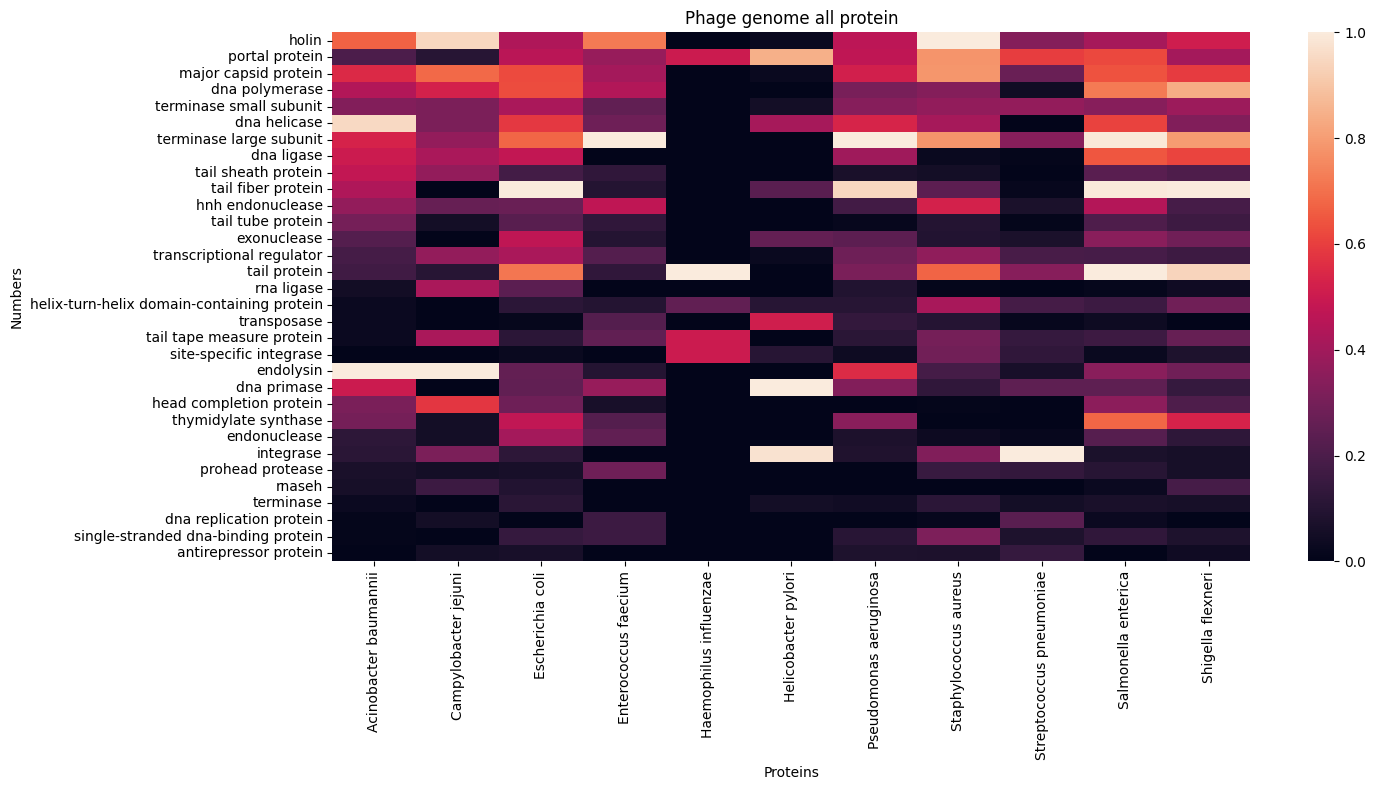

In [8]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(merged_df_norm, ax=ax) 

plt.title('Phage genome all protein') 
plt.xlabel('Proteins') 
plt.ylabel('Numbers')  

plt.tight_layout()
plt.savefig("Phage_genome_protein_all.jpg")

### <4-2> Protein : function

##### step1. reads the CSV file 

In [13]:
csv_files = [
    r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_function_Acinobacter_baumannii.csv',
    r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_function_Campylobacter_jejuni.csv',
    r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_function_Escherichia_coli.csv',
    r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_function_Enterococcus_faecium.csv',
    r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_function_Haemophilus_influenzae.csv',
    r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_function_Helicobacter_pylori.csv',
    r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_function_Pseudomonas_aeruginosa.csv',
    r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_function_Staphylococcus_aureus.csv',
    r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_function_Streptococcus_pneumoniae.csv',
    r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_function_Salmonella_enterica.csv',
    r'D:\Bacteriophage\ESKAPE\Heatmap\unique word\protein_top_function_Shigella_flexneri.csv',
]

##### step2. merges the data into a single dataframe

In [14]:
column_names = [
    'Acinobacter baumannii',
    'Campylobacter jejuni',
    'Escherichia coli',
    'Enterococcus faecium',
    'Haemophilus influenzae',
    'Helicobacter pylori',
    'Pseudomonas aeruginosa',
    'Staphylococcus aureus',
    'Streptococcus pneumoniae',
    'Salmonella enterica',
    'Shigella flexneri',
]

heatmaps = []

for csv_file in csv_files:
    heatmap = pd.read_csv(csv_file)
    heatmaps.append(heatmap)

heatmap_function_dataframe = pd.concat(heatmaps, ignore_index=True)

heatmap_function_unique_words = heatmap_function_dataframe["word"].unique()

merged_df = pd.DataFrame({"word": heatmap_function_unique_words})

for df, column_name in zip(heatmaps, column_names):
    df.set_index("word", inplace=True)
    df.rename(columns={"value": column_name}, inplace=True)
    merged_df = pd.merge(merged_df, df, on="word", how="left")

merged_df.set_index("word", inplace=True)

merged_df

,Acinobacter baumannii,Campylobacter jejuni,Escherichia coli,Enterococcus faecium,Haemophilus influenzae,Helicobacter pylori,Pseudomonas aeruginosa,Staphylococcus aureus,Streptococcus pneumoniae,Salmonella enterica,Shigella flexneri
word,,,,,,,,,,,
holin,68,18.0,456,23.0,NaN,1.0,133,297,37.0,173,26
portal protein,21,2.0,481,12.0,2.0,33.0,135,232,66.0,256,21
major capsid protein,56,13.0,644,13.0,NaN,1.0,148,233,30.0,264,30
dna polymerase,45,10.0,651,14.0,NaN,NaN,88,100,5.0,298,42
terminase small subunit,34,6.0,442,8.0,NaN,2.0,97,109,41.0,144,20
dna helicase,96,6.0,605,9.0,NaN,16.0,153,123,NaN,252,17
terminase large subunit,54,7.0,700,32.0,NaN,NaN,286,232,38.0,406,40
dna ligase,51,8.0,502,NaN,NaN,NaN,114,9,1.0,267,31
tail sheath protein,49,7.0,200,4.0,NaN,NaN,21,17,NaN,100,11


##### step3. calculates the normalized values

In [15]:
merged_df = merged_df.fillna(0)
merged_df_norm = (merged_df - merged_df.min()) / (merged_df.max() - merged_df.min())

##### step4. create the heatmap

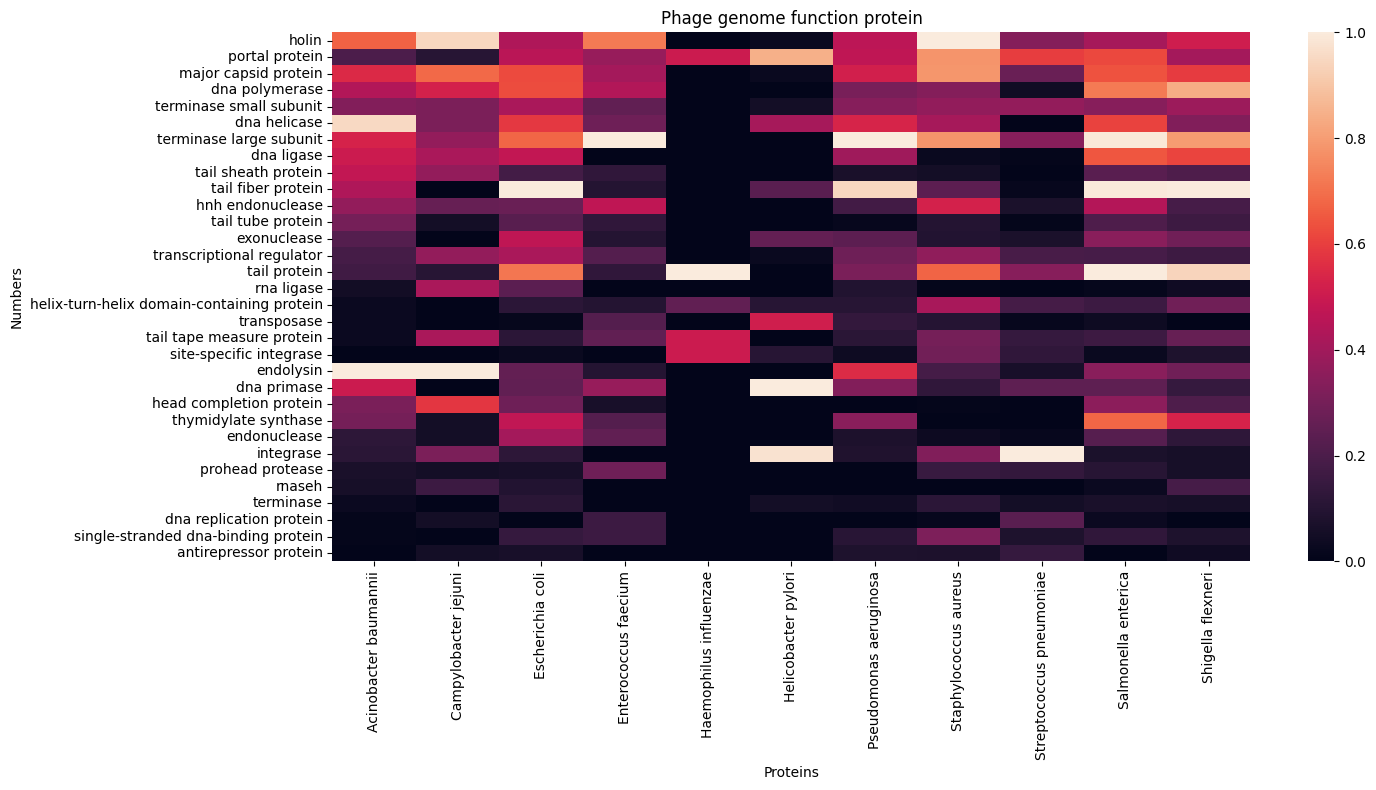

In [16]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(merged_df_norm, ax=ax) 

plt.title('Phage genome function protein') 
plt.xlabel('Proteins') 
plt.ylabel('Numbers')  

plt.tight_layout()
plt.savefig("Phage_genome_protein_function.jpg")